In [1]:
import Pkg; Pkg.add(Pkg.PackageSpec(url="https://github.com/JuliaComputing/JuliaAcademyData.jl"))
using JuliaAcademyData; activate("Deep learning with Flux")

   Updating git-repo `https://github.com/JuliaComputing/JuliaAcademyData.jl`


   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/Documents/GitHub/ai/julia/Deep learning with Flux/Project.toml`
No Changes to `~/Documents/GitHub/ai/julia/Deep learning with Flux/Manifest.toml`
 Activating environment at `~/.julia/packages/JuliaAcademyData/1to3l/courses/Deep learning with Flux/Project.toml`


<br/>

# Intro to Flux.jl

In the previous course, we learned how machine learning allows us to classify data as apples or bananas with a single neuron. However, some of those details are pretty fiddly! Fortunately, Julia has a powerful package that does much of the heavy lifting for us, called [`Flux.jl`](https://fluxml.github.io/).

*Using `Flux` will make classifying data and images much easier!*

## Using `Flux.jl`

We can get started with `Flux.jl` via:

In [2]:
# using Pkg; Pkg.add(["Flux", "Plots"])
using Flux, Plots

┌ Info: CUDAdrv.jl failed to initialize, GPU functionality unavailable (set JULIA_CUDA_SILENT or JULIA_CUDA_VERBOSE to silence or expand this message)
└ @ CUDAdrv /Users/a.a.gonzalez.paje/.julia/packages/CUDAdrv/mCr0O/src/CUDAdrv.jl:69
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


#### Helpful built-in functions

When working we'll `Flux`, we'll make use of built-in functionality that we've had to create for ourselves in previous notebooks.

For example, the sigmoid function, σ, that we have been using already lives within `Flux`:

In [3]:
?σ

"σ" can be typed by \sigma<tab>

search: σ logσ



```
σ(x) = 1 / (1 + exp(-x))
```

Classic [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.


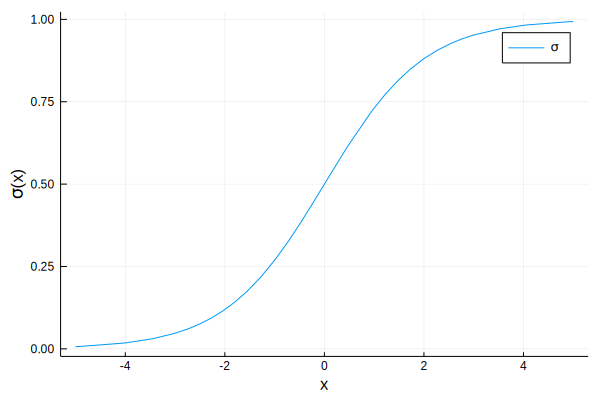

In [4]:
plot(σ, -5, 5, label="\\sigma", xlabel="x", ylabel="\\sigma\\(x\\)")

Importantly, `Flux` allows us to *automatically create neurons* with the **`Dense`** function. For example, in the last notebook, we were looking at a neuron with 2 inputs and 1 output:

 <img src="https://raw.githubusercontent.com/JuliaComputing/JuliaAcademyData.jl/master/courses/Deep%20learning%20with%20Flux/data/single-neuron.png" alt="Drawing" style="width: 500px;"/>

 We could create a neuron with two inputs and one output via

In [5]:
model = Dense(2, 1, σ)

Dense(2, 1, σ)

This `model` object comes with places to store weights and biases:

In [6]:
model.W

1×2 Array{Float32,2}:
 0.383469  -0.510021

In [7]:
model.b

1-element Array{Float32,1}:
 0.0

In [8]:
typeof(model.W)

Array{Float32,2}

In [9]:
x = rand(2)
model(x)

1-element Array{Float32,1}:
 0.50124824

In [10]:
σ.(model.W*x + model.b)

1-element Array{Float64,1}:
 0.5012482142603542

Unlike in previous notebooks, note that `W` is no longer a `Vector` (1D `Array`) and `b` is no longer a number! Both are now stored in so-called `TrackedArray`s and `W` is effectively being treated as a matrix with a single row. We'll see why below.

Other helpful built-in functionality includes ways to automatically calculate gradients and also the cost function that we've used in the previous course -

$$L(w, b) = \sum_i \left[y_i - f(x_i, w, b) \right]^2$$

If you normalize by dividing by the total number of elements, this becomes the "mean square error" function, which in `Flux` is named **`Flux.mse`**.

In [11]:
methods(Flux.mse)

# 1 method for generic function "mse":
[1] mse(ŷ, y) in Flux at /Users/a.a.gonzalez.paje/.julia/packages/Flux/2i5P1/src/layers/stateless.jl:6

### Bringing it all together

Load the datasets that contain the features of the apple and banana images.

In [12]:
using CSV, DataFrames

apples = DataFrame(CSV.File(datapath("data/apples.dat"), delim='\t', normalizenames=true))
bananas = DataFrame(CSV.File(datapath("data/bananas.dat"), delim='\t', normalizenames=true));

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278


LoadError: MethodError: Cannot `convert` an object of type Bool to an object of type String
Closest candidates are:
  convert(::Type{String}, !Matched::LLVM.MetadataAsValue) at /Users/a.a.gonzalez.paje/.julia/packages/LLVM/DAnFH/src/core/metadata.jl:18
  convert(::Type{String}, !Matched::LLVM.DataLayout) at /Users/a.a.gonzalez.paje/.julia/packages/LLVM/DAnFH/src/datalayout.jl:27
  convert(::Type{String}, !Matched::LLVM.Module) at /Users/a.a.gonzalez.paje/.julia/packages/LLVM/DAnFH/src/ir.jl:23
  ...

In [13]:
x_apples  = [ [row.red, row.green] for row in eachrow(apples)]
x_bananas = [ [row.red, row.green] for row in eachrow(bananas)];

LoadError: UndefVarError: apples not defined

Concatenate the x (features) together to create a vector of all our datapoints, and create the corresponding vector of known labels:

In [14]:
xs = [x_apples; x_bananas]
ys = [fill(0, size(x_apples)); fill(1, size(x_bananas))];

LoadError: UndefVarError: x_apples not defined

In [15]:
model = Dense(2, 1, σ)

Dense(2, 1, σ)

We can evaluate the model (currently initialized with random weights) to see what the output value is for a given input:

In [16]:
model(xs[1])

LoadError: UndefVarError: xs not defined

And of course we can examine the current loss value for that datapoint:

In [17]:
loss = Flux.mse(model(xs[1]), ys[1])

LoadError: UndefVarError: xs not defined

In [18]:
typeof(loss)

LoadError: UndefVarError: loss not defined

### Backpropagation

In [19]:
model.W

1×2 Array{Float32,2}:
 -1.32222  -0.252239

In [20]:
model.W.grad

LoadError: type Array has no field grad

In [21]:
using Flux.Tracker
back!(loss)

LoadError: UndefVarError: Tracker not defined

In [22]:
model.W.grad

LoadError: type Array has no field grad

Now we have all the tools necessary to build a simple gradient descent algorithm!

### The easy way

You don't want to manually write out gradient descent algorithms every time! Flux, of course, also brings in lots of optimizers that can do this all for you.

In [23]:
?SGD

search: SGD AMSGrad Signed signed Unsigned unsigned sigmoid issetgid logsigmoid

Couldn't find SGD
Perhaps you meant SGD, Set, Sys, BGR, GR, RGB, GC, spy, Some, sec, sin or sum


No documentation found.

Binding `SGD` does not exist.


In [24]:
?Flux.train!

```
train!(loss, params, data, opt; cb)
```

For each datapoint `d` in `data` computes the gradient of `loss(d...)` through backpropagation and calls the optimizer `opt`.

Takes a callback as keyword argument `cb`. For example, this will print "training" every 10 seconds:

```julia
Flux.train!(loss, params, data, opt,
            cb = throttle(() -> println("training"), 10))
```

The callback can call `Flux.stop()` to interrupt the training loop.

Multiple optimisers and callbacks can be passed to `opt` and `cb` as arrays.


So we can simply define our loss function, an optimizer, and then call `train!`. That's basic machine learning with Flux.jl.

In [25]:
model = Dense(2, 1, σ)
L(x,y) = Flux.mse(model(x), y)
opt = SGD(params(model))
Flux.train!(L, zip(xs, ys), opt)

LoadError: UndefVarError: SGD not defined

## Visualize the result

In [26]:
contour(0:.1:1, 0:.1:1, (x, y) -> model([x,y])[].data, fill=true)
scatter!(first.(x_apples), last.(x_apples), label="apples")
scatter!(first.(x_bananas), last.(x_bananas), label="bananas")
xlabel!("mean red value")
ylabel!("mean green value")

LoadError: type Float32 has no field data